# Analyze the BD results

In [50]:
import scvelo as scv
import scanpy
import igraph
import glob, os
import pandas as pd
import numpy as np
import re
from collections import Counter
import anndata
import shutil
import matplotlib.pyplot as plt
import h5py
from shutil import copyfile


def copyFiles(files, to):
    for f in files:
        name = os.path.basename( f )
        print( f"copy {f} to {to}" )
        copyfile( f, os.path.join(to, name ) )
    print( "all copied" )

In [51]:
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

scvelo==0.3.2
scanpy==1.10.1
igraph==0.11.4
pandas==2.2.2
numpy==1.26.4
re==2.2.1
anndata==0.10.7
h5py==3.11.0


In [52]:
files = [ 'Combined_S1Subset_DBEC_MolsPerCell.csv', 'Combined_S2Subset_DBEC_MolsPerCell.csv' ]
sinfoF = [ 'S1Subset_Sample_Tag_Calls.csv', 'S2Subset_Sample_Tag_Calls.csv']
sname = ['S1_BD', 'S2_BD' ]

ofiile = "BD_analyzed.h5ad"

In [53]:
df = pd.read_csv(files[0], skiprows=7, index_col=0)
df.columns[0:20]

Index(['CD117:2B8|Kit|AMM2023|pAbO', 'CD19|Cd19|AMM2007|pAbO',
       'CD25:PC61|Il2ra|AMM2012|pAbO', 'CD5|Cd5|AMM2043|pAbO',
       'IgM|Ighm|AMM2031|pAbO', '2810417H13Rik', 'Ada', 'Adgre1', 'Adgrg3',
       'Aicda', 'Alas2', 'Anxa5', 'Apoe', 'Aqp9', 'Arg1', 'Arg2', 'Arid3a',
       'Arl4c', 'Atf6b', 'Atg5'],
      dtype='object')

In [54]:
m = np.array([ s.__contains__ ("|") for s in df.columns ]).sum()

In [55]:
adata = anndata.AnnData(X = df.iloc[0:,m:])

In [56]:
adata.var_names
adata.obs['sample'] = sname[0]

In [57]:
df = pd.read_csv(files[1], skiprows=7, index_col=0)
tmp = anndata.AnnData(X = df.iloc[0:,m:])
tmp.obs['sample'] = sname[1]
adata = adata.concatenate( tmp )

In [58]:
! source ~/.cargo/env && cargo build -r

    Finished release [optimized] target(s) in 0.05s


# Before we run Rustody

How much time did the test analysis take using BD's seven bridges pipeline version 1?

1. The first set: 31min
2. The second set 32min
   

In [59]:
os.name

'posix'

In [60]:
if os.path.exists("Rustody_S1_gm"):
    shutil.rmtree('Rustody_S1_gm')
if not os.path.exists("Rustody_S1_gm"):
    f1 =  os.path.join( "..", "cells.1.Rhapsody_SV_index1_S1_R1_001.fastq.gz")
    f2 =  os.path.join( "..", "cells.1.Rhapsody_SV_index1_S1_R2_001.fastq.gz")
    ab =  os.path.join( "..", "MyAbSeqPanel.fasta")
    ex =  os.path.join( "..", "genes.fasta")
    exe = os.path.join( "..", '..', 'target', 'release', 'quantify_gene_mapper' )
    if os.name == 'nt': # windows...
        exe = exe + '.exe'
    print ( f"{exe} -r {f1} -f {f2} -o Rustody_S1_gm -s mouse  -e {ex} -a {ab} -m 200 -v v2.96")
    ! {exe} -r {f1} -f {f2} -o Rustody_S1_gm -s mouse  -e {ex} -a {ab} -m 200 -v v2.96

../../target/release/quantify_gene_mapper -r ../cells.1.Rhapsody_SV_index1_S1_R1_001.fastq.gz -f ../cells.1.Rhapsody_SV_index1_S1_R2_001.fastq.gz -o Rustody_S1_gm -s mouse  -e ../genes.fasta -a ../MyAbSeqPanel.fasta -m 200 -v v2.96
New output directory created successfully!
Analysis will stop after having processed 18446744073709551615 fastq entries containing a cell info

init models
the log file: Mapping_log.txt
Changing the expression start gene id to 466
After indexing all fastq files we have the following indices:
the mRNA index:
GenesMapper with 41716 mapper entries (offset 0) for 466 genes like ["Blk", "Blnk", "Btla", "C1qa", "C1qb"]
the sample id index:
GenesMapper with 447 mapper entries (offset 471) for 12 genes like ["SampleTag01_mm", "SampleTag02_mm", "SampleTag03_mm", "SampleTag04_mm", "SampleTag05_mm"]
and the antibodies index:
GenesMapper with 145 mapper entries (offset 466) for 5 genes like ["CD25:PC61", "CD5", "CD19", "CD117:2B8", "IgM"]
GenesMapper binary Index writte

# This has instead been run manually

In [61]:
if os.path.exists("Rustody_S2_gm"):
    shutil.rmtree('Rustody_S2_gm')
if not os.path.exists("Rustody_S2_gm"):
    f1 =  os.path.join( "..", "cells.1.Rhapsody_SV_index2_S2_R1_001.fastq.gz")
    f2 =  os.path.join( "..", "cells.1.Rhapsody_SV_index2_S2_R2_001.fastq.gz")
    ab =  os.path.join( "..", "MyAbSeqPanel.fasta")
    ex =  os.path.join( "..", "genes.fasta")
    print ( f"{exe} -r {f1} -f {f2} -o Rustody_S2_gm -s mouse  -e {ex} -a {ab} -m 200 -v v2.96")
    ! {exe} -r {f1} -f {f2} -o Rustody_S2_gm -s mouse  -e {ex} -a {ab} -m 200 -v v2.96

../../target/release/quantify_gene_mapper -r ../cells.1.Rhapsody_SV_index2_S2_R1_001.fastq.gz -f ../cells.1.Rhapsody_SV_index2_S2_R2_001.fastq.gz -o Rustody_S2_gm -s mouse  -e ../genes.fasta -a ../MyAbSeqPanel.fasta -m 200 -v v2.96
New output directory created successfully!
Analysis will stop after having processed 18446744073709551615 fastq entries containing a cell info

init models
the log file: Mapping_log.txt
Changing the expression start gene id to 466
After indexing all fastq files we have the following indices:
the mRNA index:
GenesMapper with 41716 mapper entries (offset 0) for 466 genes like ["Blk", "Blnk", "Btla", "C1qa", "C1qb"]
the sample id index:
GenesMapper with 447 mapper entries (offset 471) for 12 genes like ["SampleTag01_mm", "SampleTag02_mm", "SampleTag03_mm", "SampleTag04_mm", "SampleTag05_mm"]
and the antibodies index:
GenesMapper with 145 mapper entries (offset 466) for 5 genes like ["CD25:PC61", "CD5", "CD19", "CD117:2B8", "IgM"]
GenesMapper binary Index writte

# Speed comparisons

Round about 10x faster (still), so even when version2 is 10x faster we are comparable in speed.

Next is the data - comparable, too?

In [62]:
def readRustodyExpression(path, name):
    print(f"reading Rustody expression from path {path}/BD_Rhapsody_expression/")
    this = scanpy.read_10x_mtx( path+'/BD_Rhapsody_expression/' )
    this.obs['sample'] = name
    obs1 = pd.read_csv( path+'/SampleCounts.tsv', sep="\t")
    this.obs = this.obs.merge( obs1, left_index= True, right_on = 'CellID' )
    this.obs_names = this.obs['CellID'] + "_" +  this.obs['sample']
    this = this[this.obs['AssignedSampleName'] != "na"]
    this.obs['AssignedSampleName'] = this.obs['AssignedSampleName'] + "_" + this.obs['sample']
    return(this)

In [63]:
adata = adata.concatenate( readRustodyExpression( 'Rustody_S1_gm', 'S1_Rustody'))
adata = adata.concatenate(readRustodyExpression( 'Rustody_S2_gm', 'S2_Rustody'))

reading Rustody expression from path Rustody_S1_gm/BD_Rhapsody_expression/
reading Rustody expression from path Rustody_S2_gm/BD_Rhapsody_expression/


In [64]:
Counter( adata.obs['sample'])

Counter({'S1_BD': 99, 'S1_Rustody': 46, 'S2_BD': 31, 'S2_Rustody': 29})

In [65]:
adata.var_names.values

array(['2810417H13Rik', 'Ada', 'Anxa5', 'Apoe', 'Arid3a', 'Atf6b', 'Atg5',
       'Aurkb', 'Bach2', 'Bank1', 'Bax', 'Bcl11a', 'Bcl2', 'Bcl2a1a',
       'Bcl2l11', 'Bcl6', 'Bhlhe40', 'Bhlhe41', 'Bin2', 'Birc3', 'Blk',
       'Blnk', 'Btg1', 'Btk', 'Btla', 'C1qb', 'Casp1', 'Casp8', 'Cblb',
       'Ccl5', 'Ccnd2', 'Ccnd3', 'Ccr10', 'Ccr6', 'Ccr7', 'Cd19', 'Cd1d1',
       'Cd2', 'Cd22', 'Cd274', 'Cd28', 'Cd36', 'Cd37', 'Cd38', 'Cd40',
       'Cd44', 'Cd48', 'Cd52', 'Cd69', 'Cd72', 'Cd74', 'Cd79a', 'Cd79b',
       'Cd81', 'Cd86', 'Cd9', 'Cdkn1a', 'Chd3', 'Chd7', 'Cic', 'Cnot2',
       'Cr2', 'Ctla4', 'Ctsd', 'Cxcr3', 'Cxcr5', 'Ddit3', 'Ddx58',
       'Dock8', 'Dpp4', 'Dusp1', 'Dusp2', 'Ebf1', 'Ebi3', 'Egr1', 'Eno1',
       'Entpd1', 'Fam129c', 'Fam65b', 'Fas', 'Fbl', 'Fbxl12', 'Fcer2a',
       'Fcrla', 'Fkbp11', 'Flt3', 'Fosb', 'Foxo1', 'Fth1', 'Fut4', 'Fyn',
       'Gapdh', 'Gimap5', 'Gimap7', 'Glg1', 'H2-Aa', 'H2-Ab1', 'H2-DMa',
       'H2-DMb2', 'H2-Eb1', 'H2-K1', 'H2-Ob', 'Havcr1', 'Hif

In [66]:
adata[:,"Cnot2"][adata.obs['sample'] == 'S1_Rustody'].X.todense().sum()

15.0

In [67]:
scanpy.pp.filter_genes(adata, min_counts=1 )
scanpy.pp.filter_cells(adata, min_genes=20 )
Counter( adata.obs['sample'])

Counter({'S1_BD': 51, 'S1_Rustody': 45, 'S2_BD': 30, 'S2_Rustody': 29})

In [68]:
adata.obs['cellID'] =  [ re.findall(r'\d+', n)[0] for n in adata.obs_names] 

In [69]:
Counter(adata.obs['cellID'])

Counter({'1509915': 4,
         '1799438': 4,
         '8116618': 4,
         '5463585': 4,
         '4753157': 2,
         '8267932': 2,
         '7405530': 2,
         '7983433': 2,
         '1164': 2,
         '305363': 2,
         '2510987': 2,
         '6215132': 2,
         '30353': 2,
         '10175248': 2,
         '9473754': 2,
         '2090208': 2,
         '6367528': 2,
         '7695391': 2,
         '9446463': 2,
         '9892316': 2,
         '10481686': 2,
         '9152684': 2,
         '5784982': 2,
         '6800349': 2,
         '10330078': 2,
         '8405806': 2,
         '8416901': 2,
         '9613135': 2,
         '8713787': 2,
         '2543289': 2,
         '2079807': 2,
         '7693075': 2,
         '1949217': 2,
         '6069190': 2,
         '2099766': 2,
         '5160998': 2,
         '6785717': 2,
         '2538660': 2,
         '5328779': 2,
         '5343016': 2,
         '6658620': 2,
         '314929': 2,
         '2522515': 2,
         '59263

In [70]:
adata.obs['cellID']

7243072-0-0-0                 7243072
4753157-0-0-0                 4753157
8267932-0-0-0                 8267932
7405530-0-0-0                 7405530
7983433-0-0-0                 7983433
                               ...   
Cell7972283_S2_Rustody-1      7972283
Cell8116618_S2_Rustody-1      8116618
Cell8143512_S2_Rustody-1      8143512
Cell9732142_S2_Rustody-1      9732142
Cell10329694_S2_Rustody-1    10329694
Name: cellID, Length: 155, dtype: object

In [71]:
dat = adata[ adata.obs['cellID'] == '8116618' ].X.todense()
ids = [id  for id in range(dat.shape[1]) if not dat[0,id] == dat[1,id] ]
bools = [ not dat[0,id] == dat[1,id]  for id in range(dat.shape[1]) ]
adata.var.loc[bools,:]

,gene_ids-1-0,feature_types-1-0,gene_ids-1,feature_types-1,n_counts
2810417H13Rik,2810417H13Rik,Gene Expression,2810417H13Rik,Gene Expression,119.0
Ada,Ada,Gene Expression,Ada,Gene Expression,95.0
Arid3a,Arid3a,Gene Expression,Arid3a,Gene Expression,90.0
Aurkb,Aurkb,Gene Expression,Aurkb,Gene Expression,19.0
Bax,Bax,Gene Expression,Bax,Gene Expression,105.0
...,...,...,...,...,...
Tnfrsf13b,Tnfrsf13b,Gene Expression,Tnfrsf13b,Gene Expression,461.0
Trib2,Trib2,Gene Expression,Trib2,Gene Expression,103.0
Tyk2,Tyk2,Gene Expression,Tyk2,Gene Expression,67.0
Vpreb3,Vpreb3,Gene Expression,Vpreb3,Gene Expression,842.0


In [72]:
adata

AnnData object with n_obs × n_vars = 155 × 240
    obs: 'sample', 'batch', 'CellID', 'SampleTag01_mm', 'SampleTag02_mm', 'SampleTag03_mm', 'SampleTag04_mm', 'SampleTag05_mm', 'SampleTag06_mm', 'SampleTag07_mm', 'SampleTag08_mm', 'SampleTag09_mm', 'SampleTag10_mm', 'SampleTag11_mm', 'SampleTag12_mm', 'AssignedSampleName', 'FractionTotal', 'n', 'dist to nr.2 [%max]', 'n_genes', 'cellID'
    var: 'gene_ids-1-0', 'feature_types-1-0', 'gene_ids-1', 'feature_types-1', 'n_counts'

In [73]:
diff_val_BD = [ int(n) for n in dat[0,bools].transpose()]

In [74]:
diff_val_Rhapsody = [ int(n) for n in dat[1,bools].transpose()]

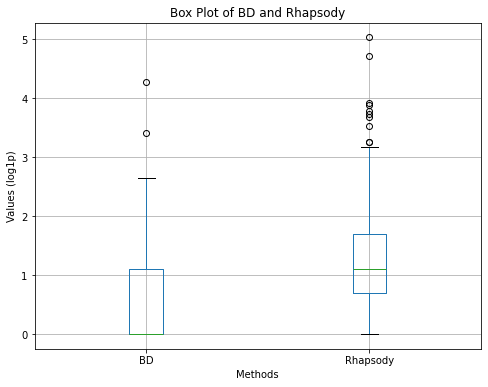

In [75]:
plt.figure(figsize=(8, 6))
df = pd.DataFrame( { 'BD' :np.log1p(diff_val_BD), 'Rhapsody' : np.log1p(diff_val_Rhapsody)})
df.boxplot()
# Set labels and title
plt.xlabel('Methods')
plt.ylabel('Values (log1p)')
plt.title('Box Plot of BD and Rhapsody')

# Show the plot
plt.show()

In [76]:
adata[ adata.obs['cellID'] == '8116618' ].obs

,sample,batch,CellID,SampleTag01_mm,SampleTag02_mm,SampleTag03_mm,SampleTag04_mm,SampleTag05_mm,SampleTag06_mm,SampleTag07_mm,...,SampleTag09_mm,SampleTag10_mm,SampleTag11_mm,SampleTag12_mm,AssignedSampleName,FractionTotal,n,dist to nr.2 [%max],n_genes,cellID
8116618-0-0-0,S1_BD,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,8116618
8116618-1-0-0,S2_BD,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,8116618
Cell8116618_S1_Rustody-1-0,S1_Rustody,0,Cell8116618,1.0,0.0,27.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,SampleTag03_mm_S1_Rustody,0.964286,28.0,0.962963,58,8116618
Cell8116618_S2_Rustody-1,S2_Rustody,1,Cell8116618,35.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,SampleTag01_mm_S2_Rustody,0.972222,36.0,0.971429,99,8116618


In [77]:
dat.shape[1]

240

In [78]:
scanpy.pp.calculate_qc_metrics( adata, inplace=True, log1p=True, percent_top= [10])

In [79]:
scanpy.pp.filter_cells(adata, min_counts=400 )
scanpy.pp.downsample_counts(adata, counts_per_cell= 400 )
scv.pp.log1p(adata)
Counter( adata.obs['sample'])

Counter({'S1_BD': 47, 'S1_Rustody': 43, 'S2_BD': 27, 'S2_Rustody': 27})

In [80]:
scanpy.pp.neighbors(adata)
dimensions = 2
scanpy.tl.umap(adata,n_components= dimensions)

         Falling back to preprocessing with `sc.pp.pca` and default params.


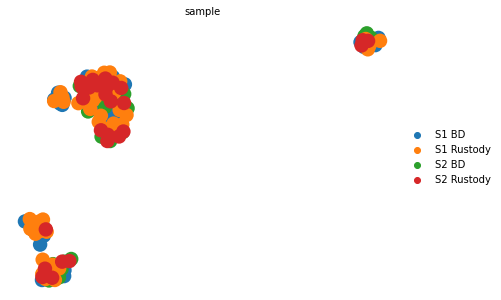

In [81]:
scv.pl.scatter(adata, color='sample', figsize =(7,5), legend_loc='right margin')

In [82]:
scanpy.tl.louvain(adata)

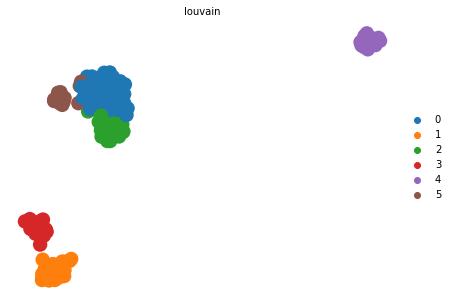

In [83]:
scv.pl.scatter(adata, color='louvain', figsize =(7,5), legend_loc='right margin')

In [84]:
adata

AnnData object with n_obs × n_vars = 144 × 240
    obs: 'sample', 'batch', 'CellID', 'SampleTag01_mm', 'SampleTag02_mm', 'SampleTag03_mm', 'SampleTag04_mm', 'SampleTag05_mm', 'SampleTag06_mm', 'SampleTag07_mm', 'SampleTag08_mm', 'SampleTag09_mm', 'SampleTag10_mm', 'SampleTag11_mm', 'SampleTag12_mm', 'AssignedSampleName', 'FractionTotal', 'n', 'dist to nr.2 [%max]', 'n_genes', 'cellID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'n_counts', 'louvain'
    var: 'gene_ids-1-0', 'feature_types-1-0', 'gene_ids-1', 'feature_types-1', 'n_counts', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p', 'neighbors', 'umap', 'sample_colors', 'louvain', 'louvain_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [85]:
adata.obs.pivot_table(values = "n_counts", index = "louvain", columns="sample", aggfunc='count')

sample,S1_BD,S1_Rustody,S2_BD,S2_Rustody
louvain,,,,
0,14,13,11,12
1,6,7,6,5
2,7,6,5,5
3,8,7,1,1
4,6,4,3,3
5,6,6,1,1


In [86]:
adata.obs['n_genes' ] = adata.obs['n_genes' ].astype('int32')

In [87]:
adata

AnnData object with n_obs × n_vars = 144 × 240
    obs: 'sample', 'batch', 'CellID', 'SampleTag01_mm', 'SampleTag02_mm', 'SampleTag03_mm', 'SampleTag04_mm', 'SampleTag05_mm', 'SampleTag06_mm', 'SampleTag07_mm', 'SampleTag08_mm', 'SampleTag09_mm', 'SampleTag10_mm', 'SampleTag11_mm', 'SampleTag12_mm', 'AssignedSampleName', 'FractionTotal', 'n', 'dist to nr.2 [%max]', 'n_genes', 'cellID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'n_counts', 'louvain'
    var: 'gene_ids-1-0', 'feature_types-1-0', 'gene_ids-1', 'feature_types-1', 'n_counts', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p', 'neighbors', 'umap', 'sample_colors', 'louvain', 'louvain_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

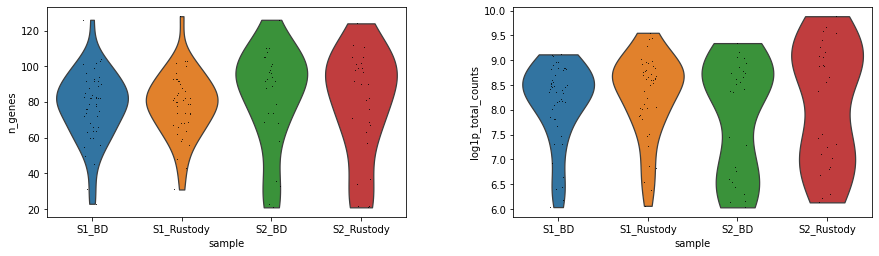

In [88]:
scanpy.pl.violin(adata, [ 'n_genes', 'log1p_total_counts' ], 'sample')

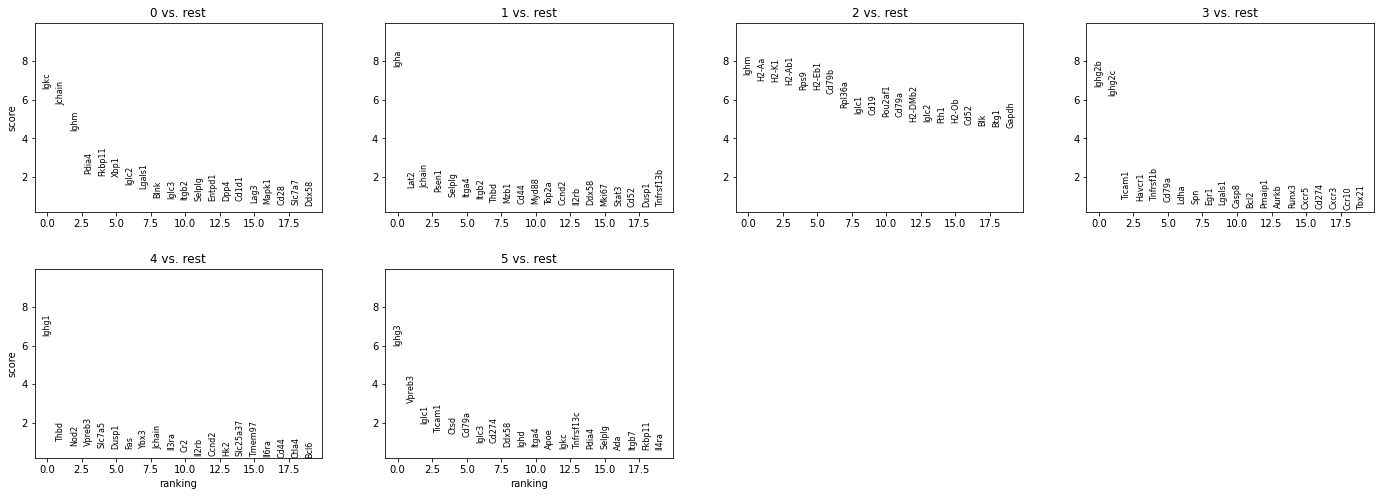

In [89]:
key_added = "louvain"
scanpy.tl.rank_genes_groups(
    adata, 
    groupby   = 'louvain',
    key_added = key_added,
    method    = 'wilcoxon',
)

scanpy.pl.rank_genes_groups(adata, key = key_added )

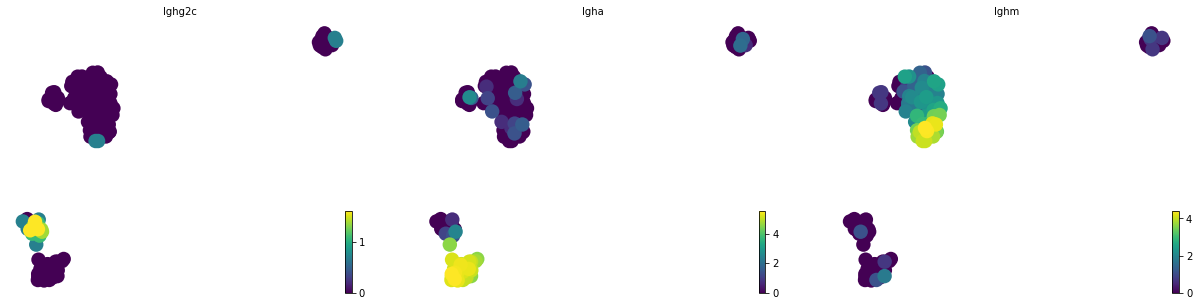

In [90]:
scv.pl.scatter(adata, color=['Ighg2c', 'Igha', 'Ighm'], figsize =(7,5), legend_loc='right margin')

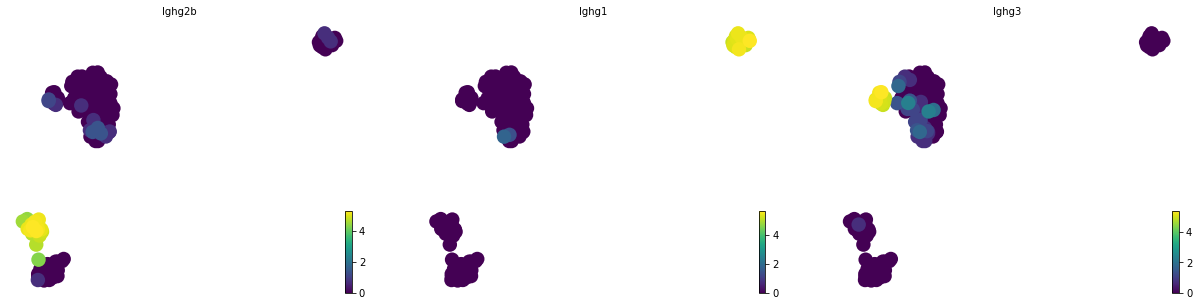

In [91]:
scv.pl.scatter(adata, color=[  'Ighg2b', 'Ighg1', 'Ighg3' ], figsize =(7,5), legend_loc='right margin')

In [92]:
names = np.array(adata.obs['sample'].unique()).astype('str')
names.sort()
names

array(['S1_BD', 'S1_Rustody', 'S2_BD', 'S2_Rustody'], dtype='<U10')

S1_BD


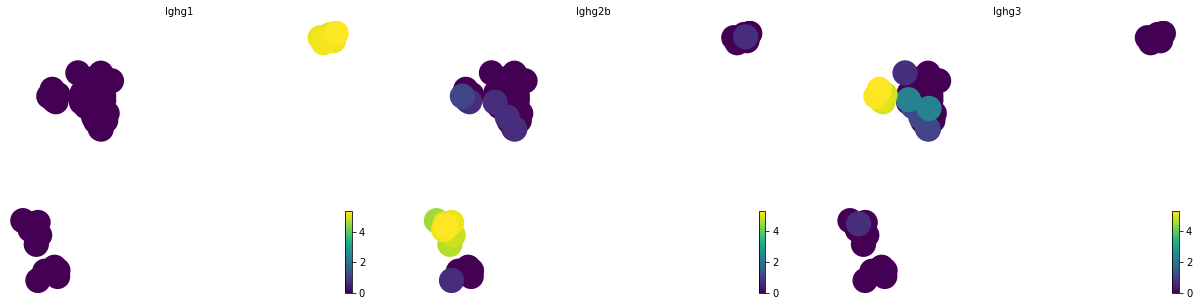

S1_Rustody


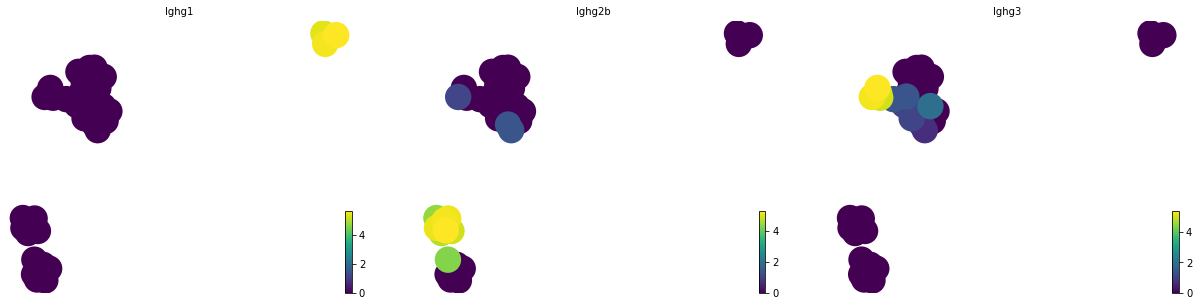

S2_BD


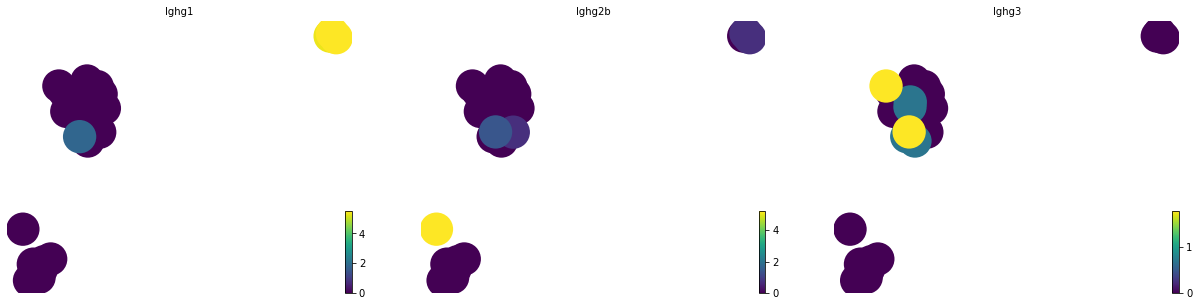

S2_Rustody


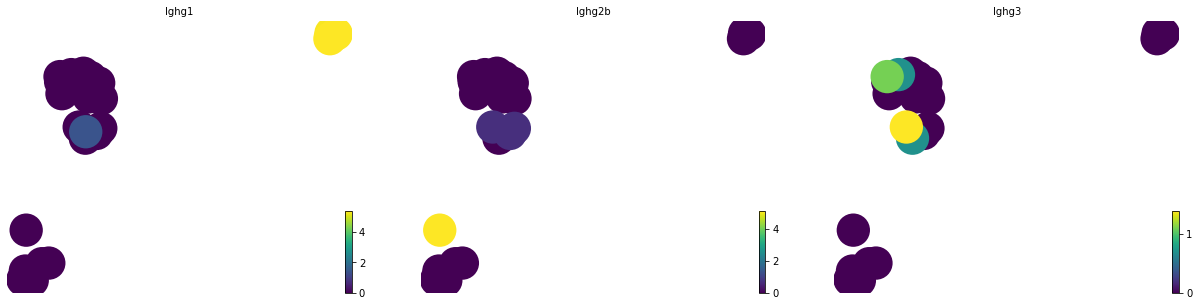

In [93]:
for n in names:
    print (n)
    scv.pl.scatter(adata[adata.obs['sample'] == n], color=[ 'Ighg1', 'Ighg2b', 'Ighg3' ], figsize =(7,5), legend_loc='right margin')

In [94]:
adata.var_names

Index(['2810417H13Rik', 'Ada', 'Anxa5', 'Apoe', 'Arid3a', 'Atf6b', 'Atg5',
       'Aurkb', 'Bach2', 'Bank1',
       ...
       'Tspan32', 'Tyk2', 'Tyms', 'Ube2c', 'Vegfa', 'Vpreb3', 'Vps28', 'Xbp1',
       'Ybx3', 'tdTomato'],
      dtype='object', length=240)

S1_BD


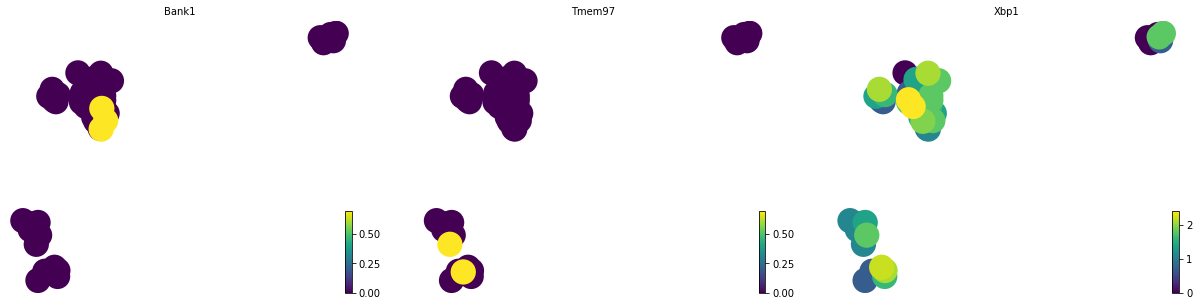

S1_Rustody


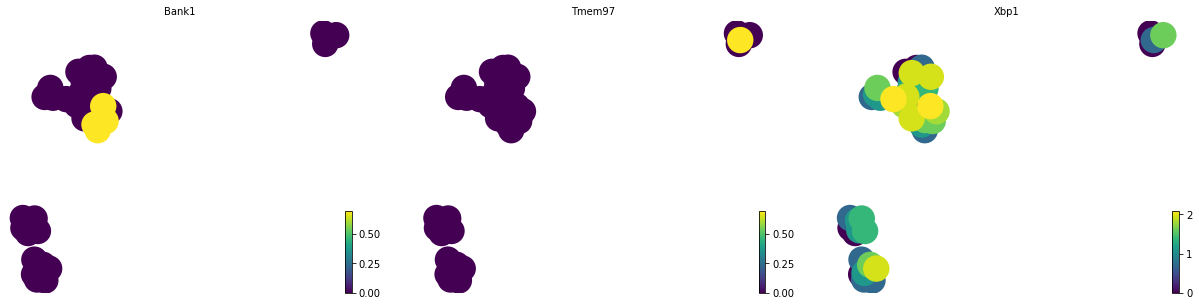

S2_BD


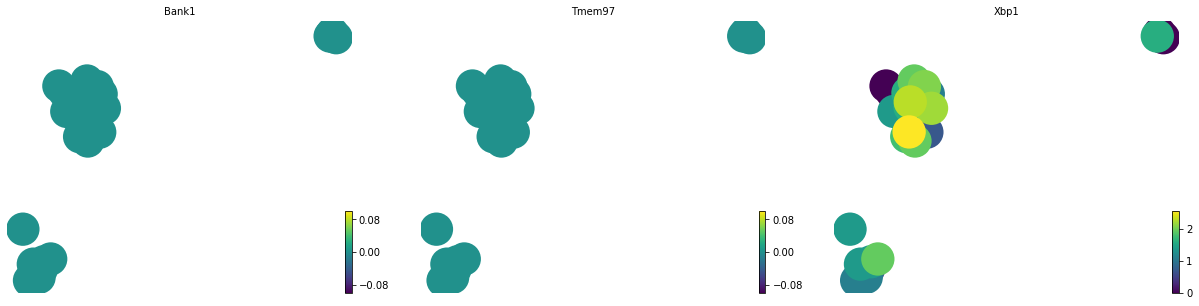

S2_Rustody


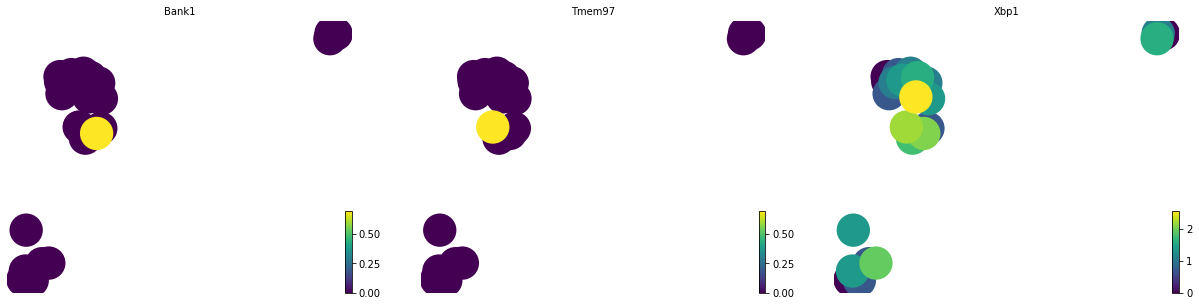

In [95]:
for n in names:
    print (n)
    scv.pl.scatter(adata[adata.obs['sample'] == n], color=[ 'Bank1', 'Tmem97', 'Xbp1' ], figsize =(7,5), legend_loc='right margin')